In [1]:
import numpy as np
import torch
import clip
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter
from scipy.special import softmax

from src.clip_video_response import clip_video_response

In [2]:
path = "..\\data\\videos\\sports.mp4"

# Note: uncomment if you want to view the video, otherwise leave commented.
# Embedding videos into notebook can cause UI to slow down
# Video(path, embed=True)

In [3]:
query_volleyball = "video of people playing volleyball"
query_basketball = "video of people playing basketball"
query_soccer = "video of people playing soccer"
query_neutral = "video of people playing a sport"
queries = [query_volleyball, query_basketball, query_soccer, query_neutral]

# query_volleyball = "photo of volleyball"
# query_basketball = "photo of basketball"
# query_soccer = "photo of soccer"

In [12]:
response = clip_video_response()
responses = response.generate_response_curve(video_path=path, queries=queries, sampling_rate=1)
volleyball_response = responses[0]
basketball_reponse = responses[1]
soccer_response = responses[2]
neutral_response = responses[3]

filtered_volleyball_response = savgol_filter(volleyball_response, 80, 3)
filtered_basketball_reponse = savgol_filter(basketball_reponse, 80, 3)
filtered_soccer_response = savgol_filter(soccer_response, 80, 3)
filtered_neutral_response = savgol_filter(neutral_response, 80, 3)

normalized_volleyball_response = stats.zscore(filtered_volleyball_response)
normalized_basketball_reponse = stats.zscore(filtered_basketball_reponse)
normalized_soccer_response = stats.zscore(filtered_soccer_response)
normalized_neutral_response = stats.zscore(filtered_neutral_response)

relative_volleyball_response = filtered_volleyball_response - filtered_neutral_response
relative_basketball_reponse = filtered_basketball_reponse - filtered_neutral_response
relative_soccer_response = filtered_soccer_response - filtered_neutral_response

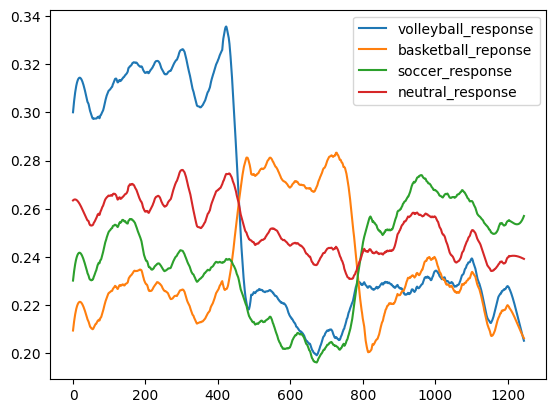

In [19]:
plt.plot(filtered_volleyball_response, label="volleyball_response")
plt.plot(filtered_basketball_reponse, label="basketball_reponse")
plt.plot(filtered_soccer_response, label="soccer_response")
plt.plot(filtered_neutral_response, label="neutral_response")
plt.legend()

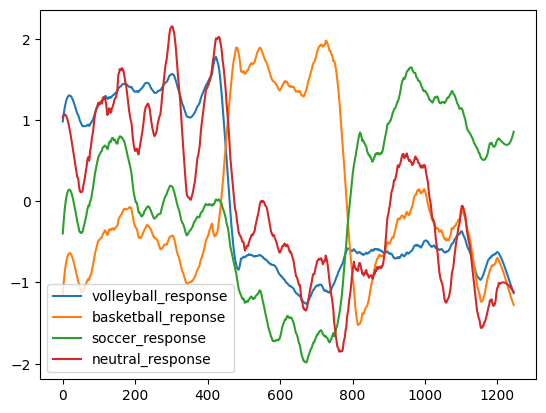

In [20]:
plt.plot(normalized_volleyball_response, label="volleyball_response")
plt.plot(normalized_basketball_reponse, label="basketball_reponse")
plt.plot(normalized_soccer_response, label="soccer_response")
plt.plot(normalized_neutral_response, label="neutral_response")
plt.legend()

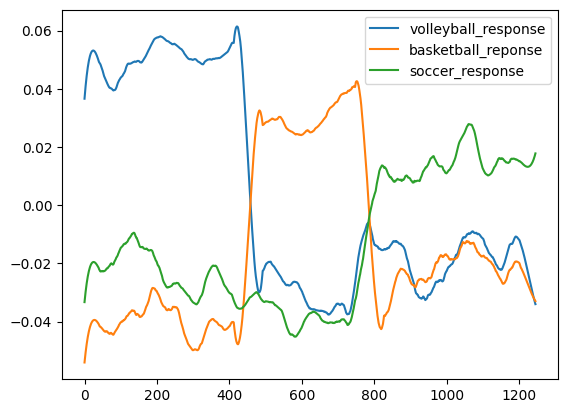

In [21]:
plt.plot(relative_volleyball_response, label="volleyball_response")
plt.plot(relative_basketball_reponse, label="basketball_reponse")
plt.plot(relative_soccer_response, label="soccer_response")
plt.legend()

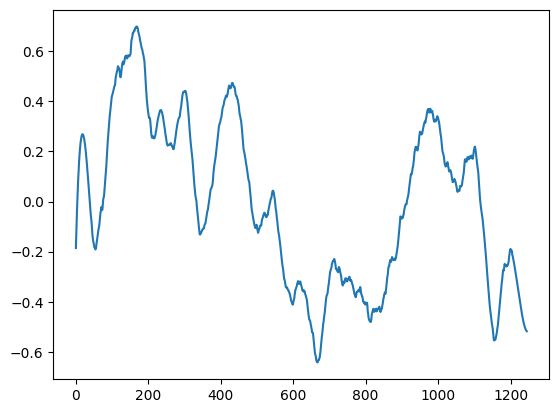

In [22]:
average_curve = np.mean(np.array([normalized_volleyball_response, normalized_basketball_reponse, normalized_soccer_response]), axis=0)
plt.plot(average_curve)

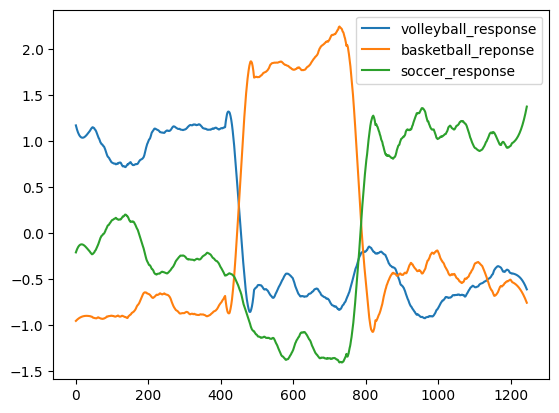

In [23]:
plt.plot(normalized_volleyball_response - average_curve, label="volleyball_response")
plt.plot(normalized_basketball_reponse - average_curve, label="basketball_reponse")
plt.plot(normalized_soccer_response - average_curve, label="soccer_response")
plt.legend()

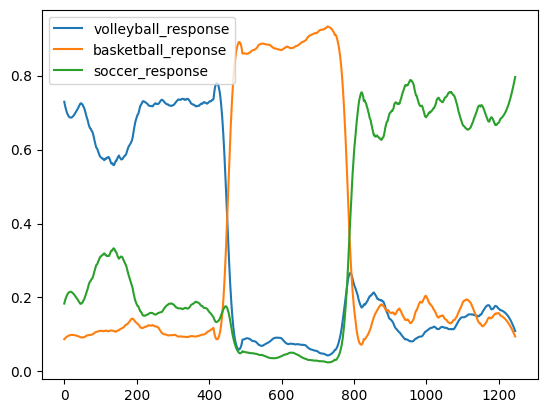

In [24]:
softmax_responses = softmax(np.array([normalized_volleyball_response, normalized_basketball_reponse, normalized_soccer_response]), axis = 0)
sm_volleyball_response, sm_basketball_reponse, sm_soccer_response = softmax_responses

plt.plot(sm_volleyball_response, label="volleyball_response")
plt.plot(sm_basketball_reponse, label="basketball_reponse")
plt.plot(sm_soccer_response, label="soccer_response")
plt.legend()

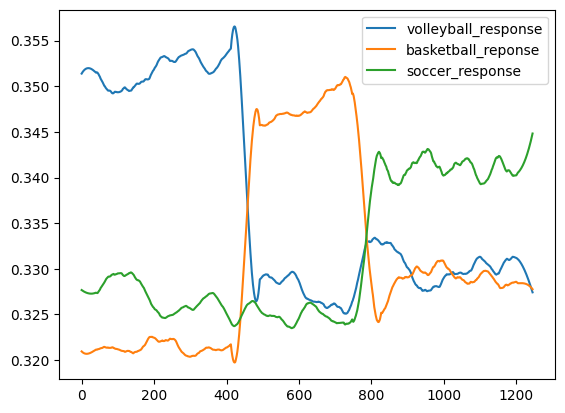

In [25]:
softmax_responses = softmax(np.array([filtered_volleyball_response, filtered_basketball_reponse, filtered_soccer_response]), axis = 0)
sm_volleyball_response, sm_basketball_reponse, sm_soccer_response = softmax_responses

plt.plot(sm_volleyball_response, label="volleyball_response")
plt.plot(sm_basketball_reponse, label="basketball_reponse")
plt.plot(sm_soccer_response, label="soccer_response")
plt.legend()